In [47]:
import pandas as pd

df=pd.read_csv('data\senhub\hub_device_357.csv')
df

,updated,_id_x,device_id_x,days,sex,temperature,humidity,voc,_id_y,device_id_y,tem,hum
0,2023-05-10 07:13:26,356717890.0,357.0,221.0,0.0,3096.0,2782.0,0.0,NaN,NaN,NaN,NaN
1,2023-05-10 07:13:27,356717930.0,357.0,221.0,0.0,3096.0,2770.0,0.0,NaN,NaN,NaN,NaN
2,2023-05-10 07:13:28,356717931.0,357.0,221.0,0.0,3096.0,2750.0,0.0,NaN,NaN,NaN,NaN
3,2023-05-10 07:13:29,356717932.0,357.0,221.0,0.0,3096.0,2744.0,0.0,NaN,NaN,NaN,NaN
4,2023-05-10 07:13:30,356717933.0,357.0,221.0,0.0,3096.0,2738.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16188565,2023-11-13 16:02:39,405957086.0,357.0,408.0,0.0,2802.0,3654.0,7004.0,NaN,NaN,NaN,NaN
16188566,2023-11-13 16:02:40,405957087.0,357.0,408.0,0.0,2803.0,3654.0,6942.0,NaN,NaN,NaN,NaN
16188567,2023-11-13 16:02:41,405957088.0,357.0,408.0,0.0,2803.0,3655.0,7017.0,NaN,NaN,NaN,NaN
16188568,2023-11-13 16:02:42,405957089.0,357.0,408.0,0.0,2802.0,3655.0,6995.0,NaN,NaN,NaN,NaN


In [48]:
# 357

In [49]:
import pandas as pd

# 만약 df가 데이터 프레임의 이름이라면:
df['updated'] = pd.to_datetime(df['updated'])
df.set_index('updated', inplace=True)

df['temperature'] = df['temperature']*0.01
df['humidity'] = df['humidity']*0.01
df['tem'] = df['tem']*0.01
df['hum'] = df['hum']*0.01



# 'tem'과 'hum' 열의 1분 간격의 평균을 계산합니다.
df['tem_avg'] = df['tem'].resample('1T').mean()
df['hum_avg'] = df['hum'].resample('1T').mean()

# 'tem_avg'와 'hum_avg' 열의 NaN값을 채웁니다.
df['tem_avg'].fillna(method='ffill', inplace=True)
df['hum_avg'].fillna(method='ffill', inplace=True)

# 이평선, 미분데이터
df['temperature_moving_avg'] = df['temperature'].rolling('3600s').mean()
df['humidity_moving_avg'] = df['humidity'].rolling('3600s').mean()
df['voc_moving_avg'] = df['voc'].rolling('3600s').mean()
df['tem_avg_moving_avg'] = df['tem_avg'].rolling('3600s').mean()
df['hum_avg_moving_avg'] = df['hum_avg'].rolling('3600s').mean()
df['temperature_moving_avg_diff'] = df['temperature_moving_avg'].diff()
df['humidity_moving_avg_diff'] = df['humidity_moving_avg'].diff()
df['voc_moving_avg_diff'] = df['voc_moving_avg'].diff()
df['tem_avg_moving_avg_diff'] = df['tem_avg_moving_avg'].diff()
df['hum_avg_moving_avg_diff'] = df['hum_avg_moving_avg'].diff()


C:\Users\yeong\AppData\Local\Temp\ipykernel_13264\894949263.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['tem_avg'].fillna(method='ffill', inplace=True)
C:\Users\yeong\AppData\Local\Temp\ipykernel_13264\894949263.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['hum_avg'].fillna(method='ffill', inplace=True)


In [50]:
df

,_id_x,device_id_x,days,sex,temperature,humidity,voc,_id_y,device_id_y,tem,...,temperature_moving_avg,humidity_moving_avg,voc_moving_avg,tem_avg_moving_avg,hum_avg_moving_avg,temperature_moving_avg_diff,humidity_moving_avg_diff,voc_moving_avg_diff,tem_avg_moving_avg_diff,hum_avg_moving_avg_diff
updated,,,,,,,,,,,,,,,,,,,,,
2023-05-10 07:13:26,356717890.0,357.0,221.0,0.0,30.96,27.82,0.0,NaN,NaN,NaN,...,30.960000,27.820000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-10 07:13:27,356717930.0,357.0,221.0,0.0,30.96,27.70,0.0,NaN,NaN,NaN,...,30.960000,27.760000,0.000000,NaN,NaN,0.000000,-0.060000,0.000000,NaN,NaN
2023-05-10 07:13:28,356717931.0,357.0,221.0,0.0,30.96,27.50,0.0,NaN,NaN,NaN,...,30.960000,27.673333,0.000000,NaN,NaN,0.000000,-0.086667,0.000000,NaN,NaN
2023-05-10 07:13:29,356717932.0,357.0,221.0,0.0,30.96,27.44,0.0,NaN,NaN,NaN,...,30.960000,27.615000,0.000000,NaN,NaN,0.000000,-0.058333,0.000000,NaN,NaN
2023-05-10 07:13:30,356717933.0,357.0,221.0,0.0,30.96,27.38,0.0,NaN,NaN,NaN,...,30.960000,27.568000,0.000000,NaN,NaN,0.000000,-0.047000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-13 16:02:39,405957086.0,357.0,408.0,0.0,28.02,36.54,7004.0,NaN,NaN,NaN,...,28.010218,36.754451,7427.226089,24.079681,48.324441,0.000006,-0.000110,-0.166101,0.000014,-0.000245
2023-11-13 16:02:40,405957087.0,357.0,408.0,0.0,28.03,36.54,6942.0,NaN,NaN,NaN,...,28.010226,36.754341,7427.051217,24.079696,48.324196,0.000008,-0.000110,-0.174873,0.000014,-0.000245
2023-11-13 16:02:41,405957088.0,357.0,408.0,0.0,28.03,36.55,7017.0,NaN,NaN,NaN,...,28.010235,36.754233,7426.921336,24.079710,48.323952,0.000008,-0.000108,-0.129881,0.000014,-0.000245


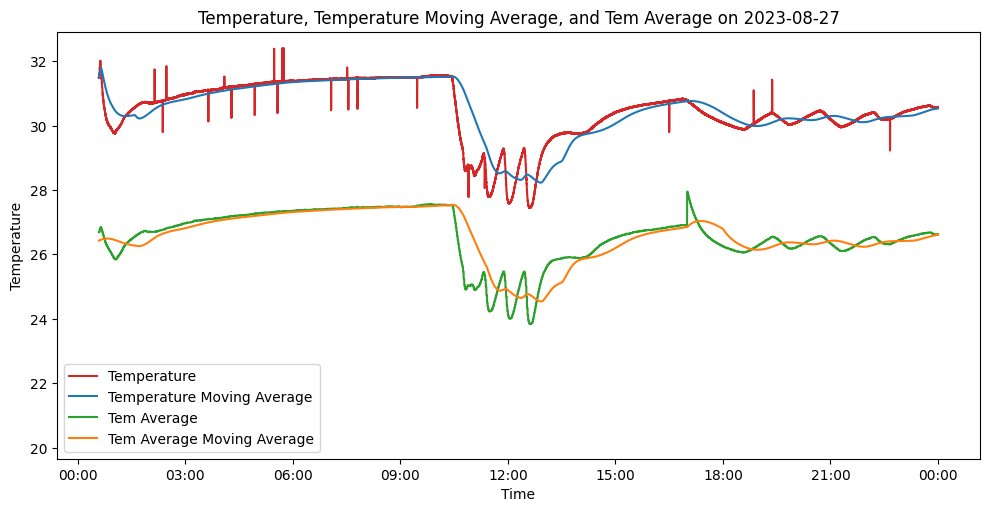

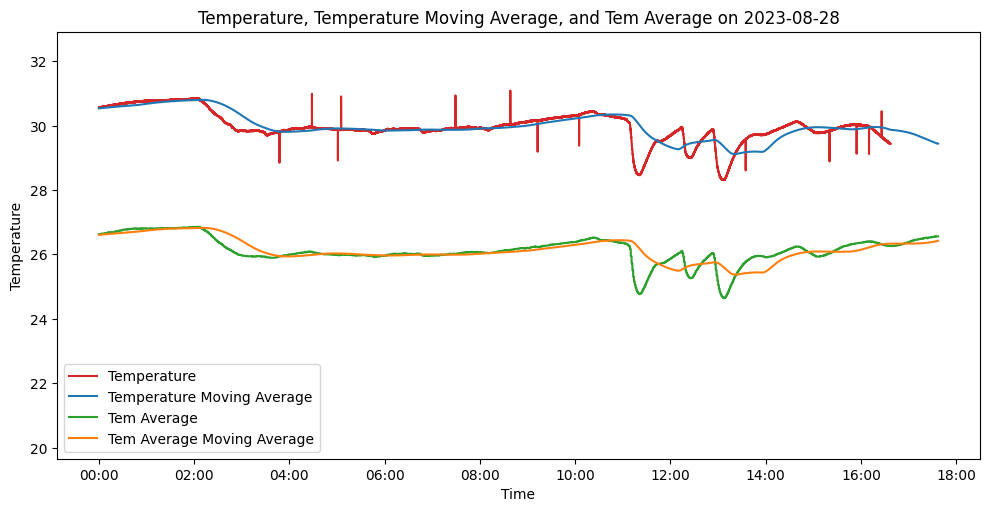

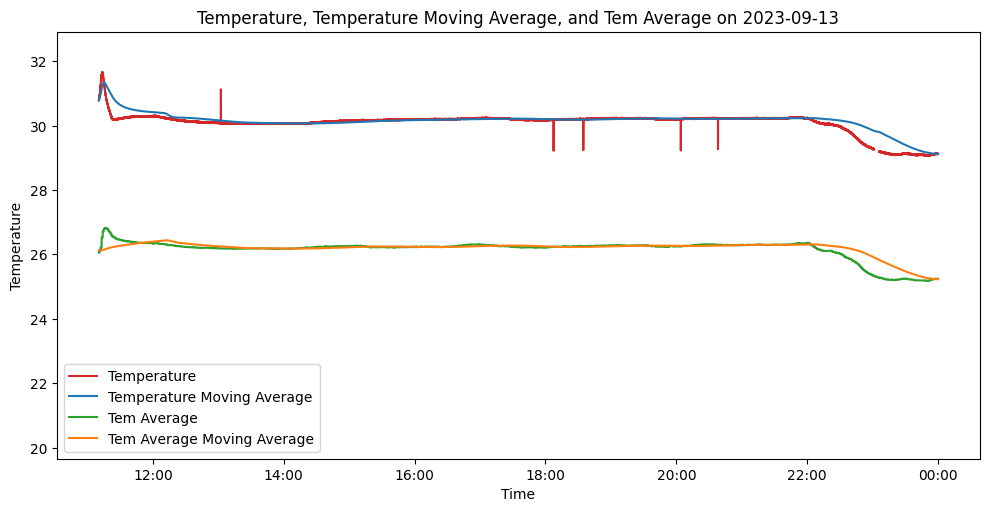

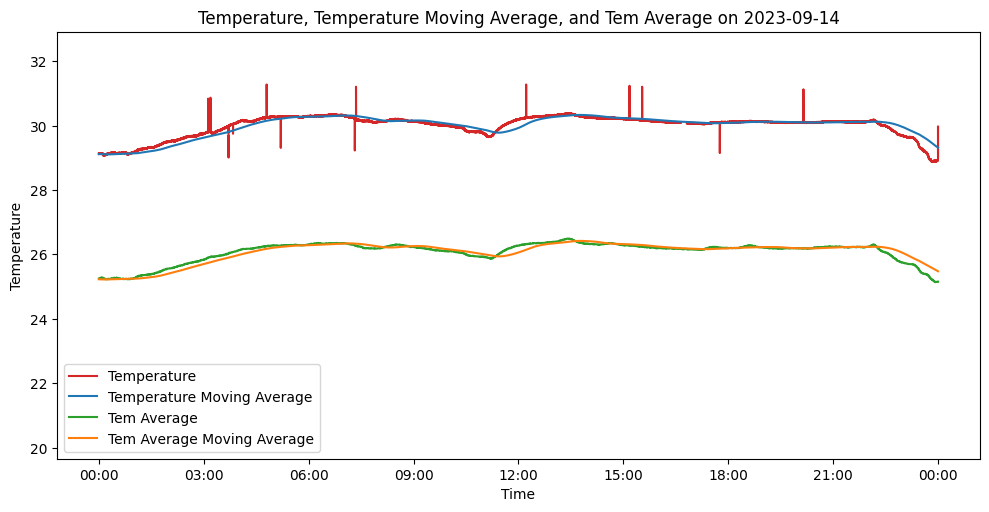

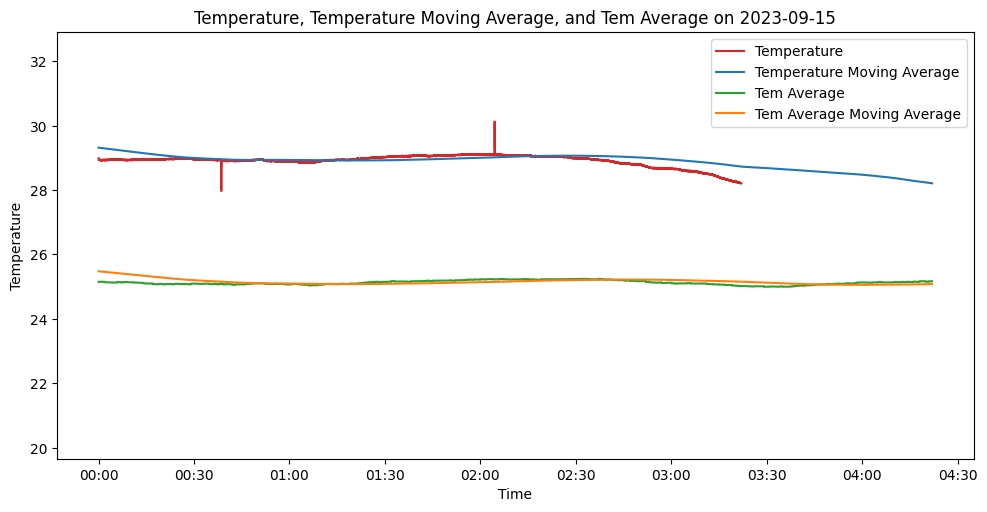

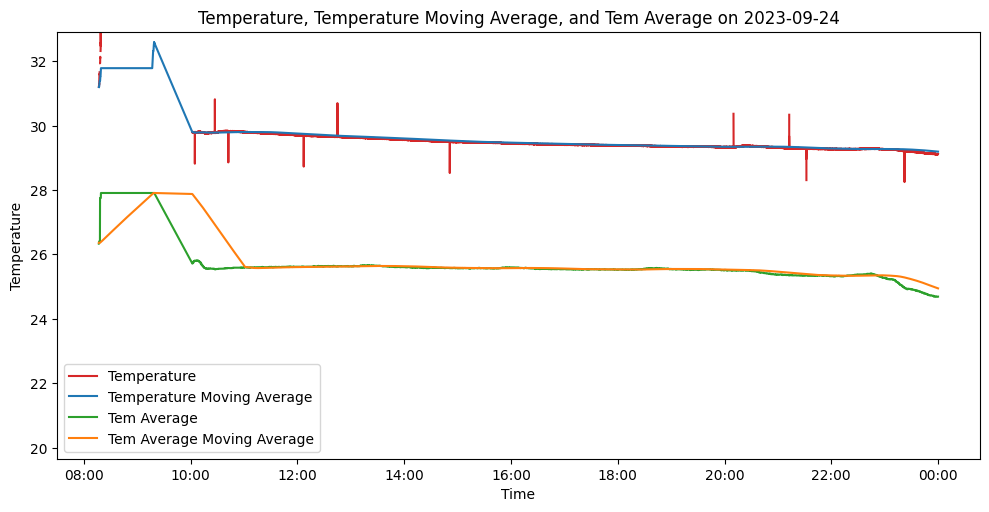

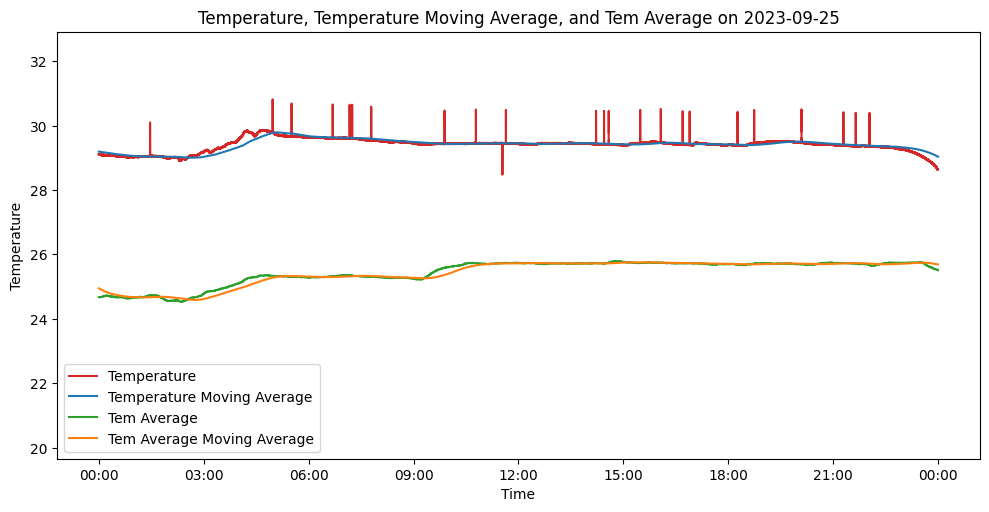

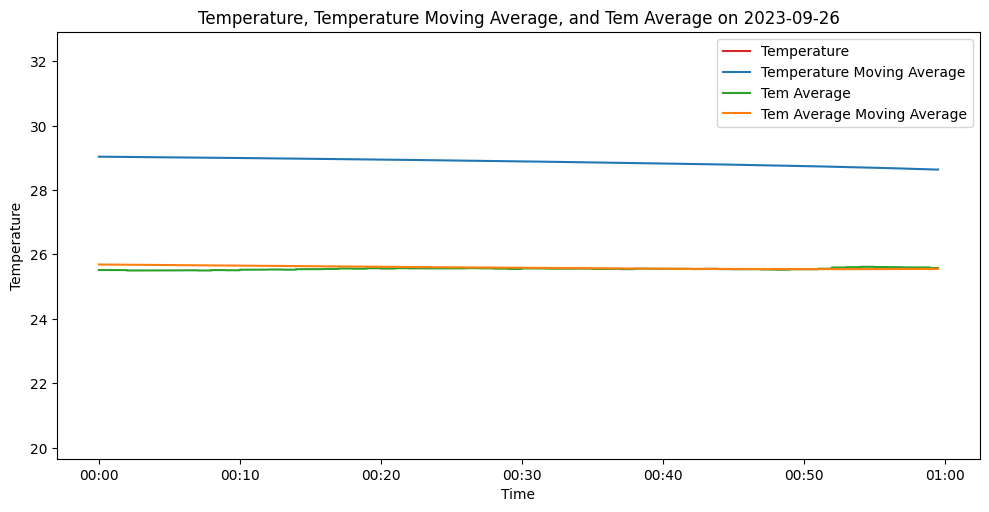

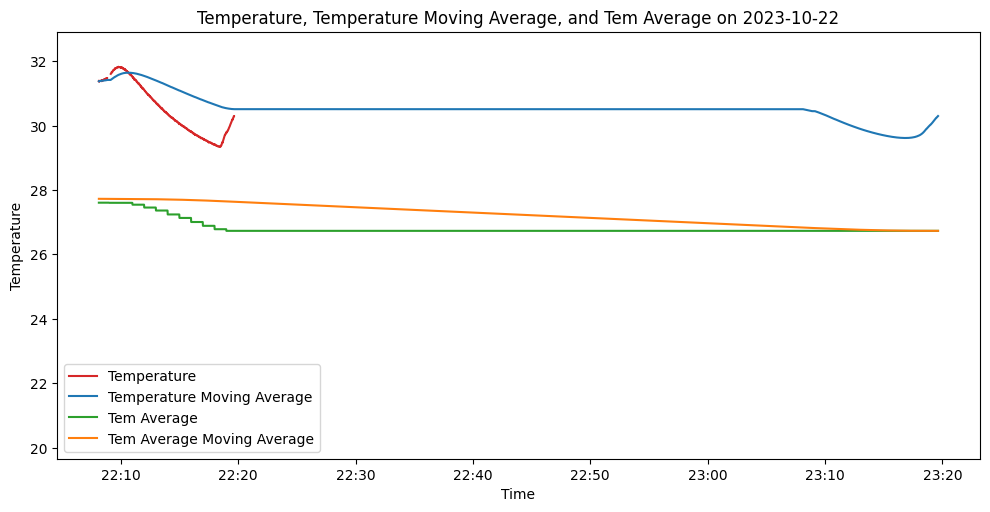

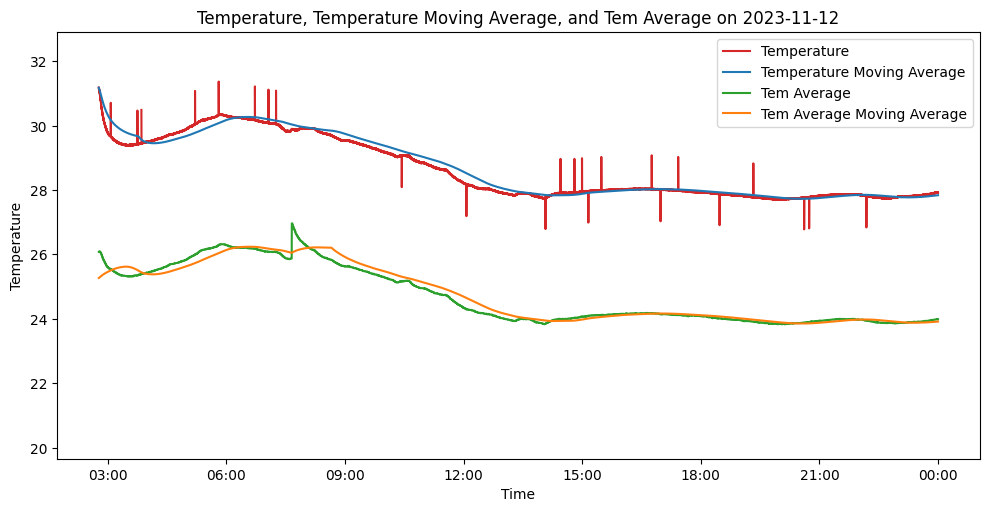

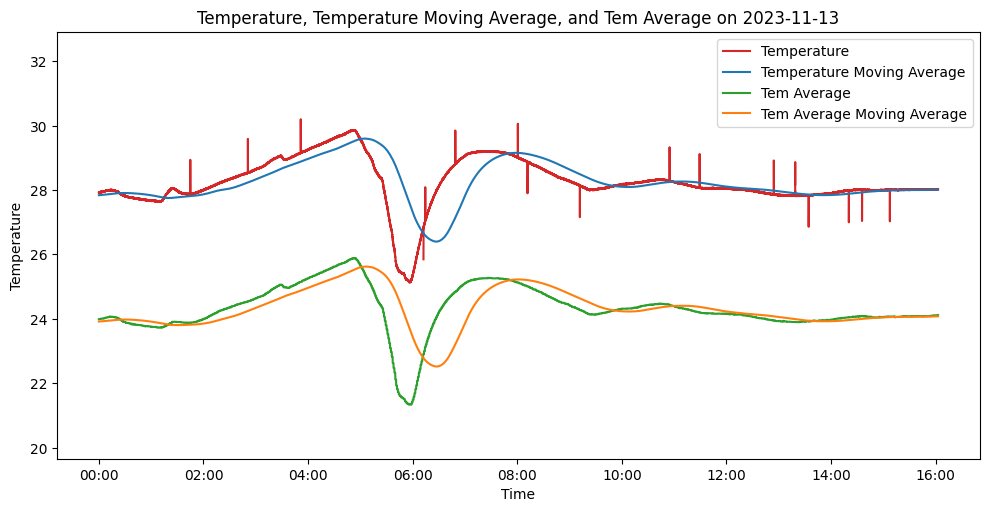

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# unique days를 추출합니다.
unique_days = df.index.normalize().unique()

# 데이터의 최소값과 최대값을 구합니다.
ymin = min(df[['temperature', 'temperature_moving_avg', 'tem_avg']].min())
ymax = max(df[['temperature', 'temperature_moving_avg', 'tem_avg']].max())

for day in unique_days:
    # 해당 날짜의 데이터만 선택합니다.
    daily_data = df.loc[df.index.normalize() == day]

    # 'temperature_moving_avg'와 'tem_avg'가 모두 NaN이 아닌 행만 선택합니다.
    daily_data = daily_data.dropna(subset=['temperature_moving_avg', 'tem_avg'])

    # 해당 날짜의 데이터가 없다면 continue를 사용하여 다음 반복으로 넘어갑니다.
    if daily_data[['temperature', 'temperature_moving_avg', 'tem_avg']].empty:
        continue

    # 그래프를 그립니다.
    fig, ax = plt.subplots(figsize=(10,5))

    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature')
    ax.plot(daily_data.index, daily_data['temperature'], color='tab:red', label='Temperature')
    ax.plot(daily_data.index, daily_data['temperature_moving_avg'], color='tab:blue', label='Temperature Moving Average')
    ax.plot(daily_data.index, daily_data['tem_avg'], color='tab:green', label='Tem Average')  # 'tem_avg' 열의 데이터를 그래프에 추가
    ax.plot(daily_data.index, daily_data['tem_avg_moving_avg'], color='tab:orange', label='Tem Average Moving Average')  # 'tem_avg_moving_avg' 열의 데이터를 그래프에 추가
    ax.tick_params(axis='y')
    ax.legend()

    # y축 범위를 설정합니다.
    ax.set_ylim(ymin, ymax)

    # 시간 형식을 설정합니다.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    fig.tight_layout()  
    plt.title(f'Temperature, Temperature Moving Average, and Tem Average on {day.date()}')
    plt.show()


In [31]:
# 'temperature_moving_avg', 'tem_avg_moving_avg' 열이 모두 NaN이 아닌 행만 선택합니다.
new_df = df.dropna(subset=['temperature_moving_avg', 'tem_avg_moving_avg'])
new_df['temp_avg_difference'] = new_df['temperature_moving_avg'] - new_df['tem_avg_moving_avg']



C:\Users\yeong\AppData\Local\Temp\ipykernel_13264\2144686930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['temp_avg_difference'] = new_df['temperature_moving_avg'] - new_df['tem_avg_moving_avg']


In [32]:
new_df

,_id_x,device_id_x,days,sex,temperature,humidity,voc,_id_y,device_id_y,tem,...,humidity_moving_avg,voc_moving_avg,tem_avg_moving_avg,hum_avg_moving_avg,temperature_moving_avg_diff,humidity_moving_avg_diff,voc_moving_avg_diff,tem_avg_moving_avg_diff,hum_avg_moving_avg_diff,temp_avg_difference
updated,,,,,,,,,,,,,,,,,,,,,
2023-08-27 00:35:36,389198301.0,357.0,330.0,0.0,31.49,43.46,7583.0,474584644.0,1743.0,26.70,...,43.460000,7583.000000,26.707590,56.642687,NaN,NaN,NaN,0.000007,0.000762,4.782410
2023-08-27 00:35:36,389198301.0,357.0,330.0,0.0,31.49,43.46,7583.0,474584641.0,1743.0,26.70,...,43.460000,7583.000000,26.707565,56.643562,0.000000e+00,0.000000,0.000000,-0.000025,0.000875,4.782435
2023-08-27 00:35:37,NaN,357.0,330.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,43.460000,7583.000000,26.707572,56.644323,0.000000e+00,0.000000,0.000000,0.000007,0.000761,4.782428
2023-08-27 00:35:38,389198333.0,357.0,330.0,0.0,31.49,43.75,7487.0,NaN,NaN,NaN,...,43.556667,7551.000000,26.707579,56.645083,0.000000e+00,0.096667,-32.000000,0.000007,0.000761,4.782421
2023-08-27 00:35:39,389198334.0,357.0,330.0,0.0,31.49,44.12,7368.0,NaN,NaN,NaN,...,43.697500,7505.250000,26.707586,56.645844,0.000000e+00,0.140833,-45.750000,0.000007,0.000761,4.782414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-13 16:02:39,405957086.0,357.0,408.0,0.0,28.02,36.54,7004.0,NaN,NaN,NaN,...,36.576667,7053.627148,24.101867,47.948867,3.552714e-15,-0.000120,-0.036082,0.000047,-0.000178,3.916570
2023-11-13 16:02:40,405957087.0,357.0,408.0,0.0,28.03,36.54,6942.0,NaN,NaN,NaN,...,36.576546,7053.525773,24.101913,47.948688,1.718213e-05,-0.000120,-0.101375,0.000047,-0.000178,3.916540
2023-11-13 16:02:41,405957088.0,357.0,408.0,0.0,28.03,36.55,7017.0,NaN,NaN,NaN,...,36.576460,7053.517182,24.101960,47.948510,1.718213e-05,-0.000086,-0.008591,0.000047,-0.000178,3.916511


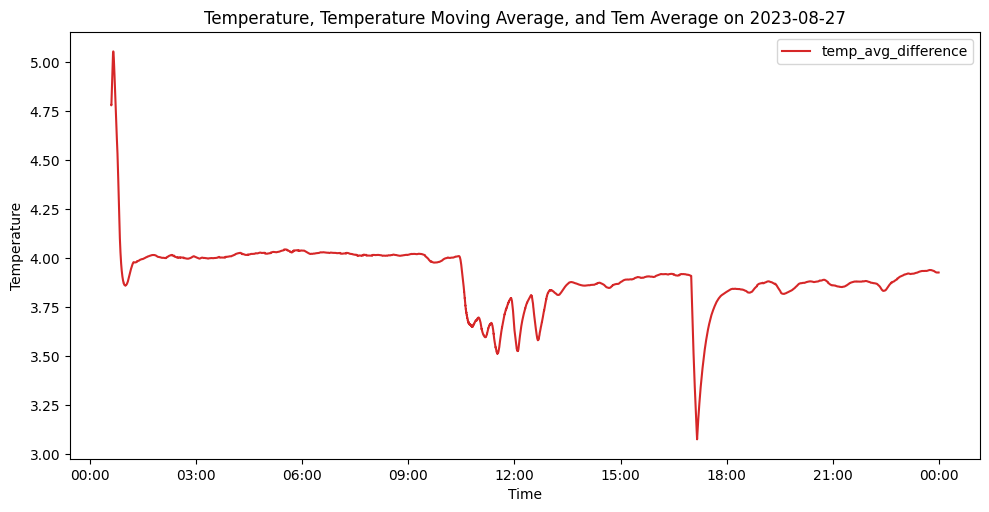

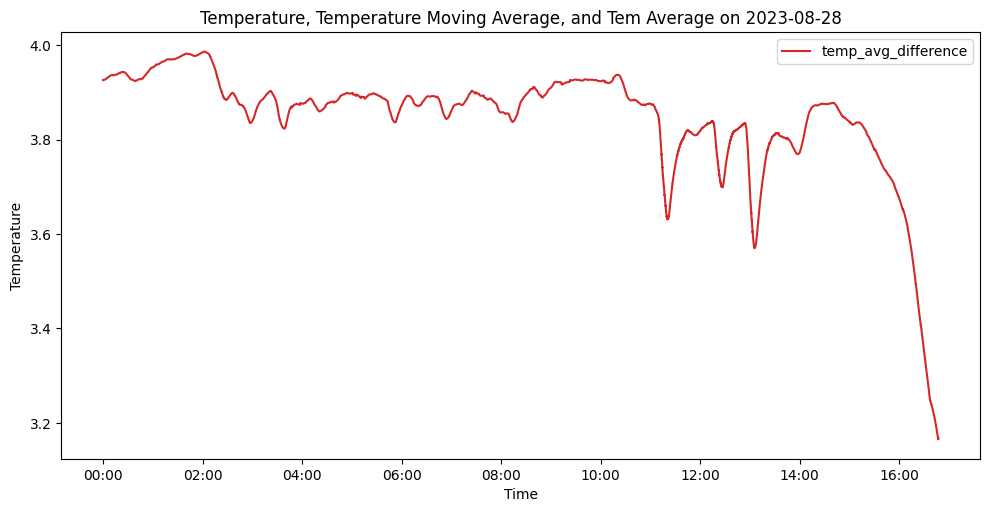

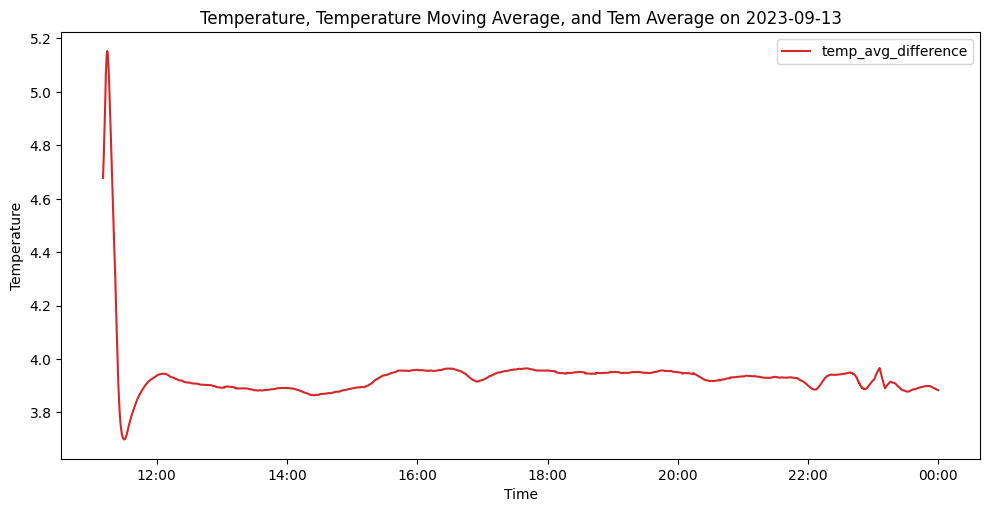

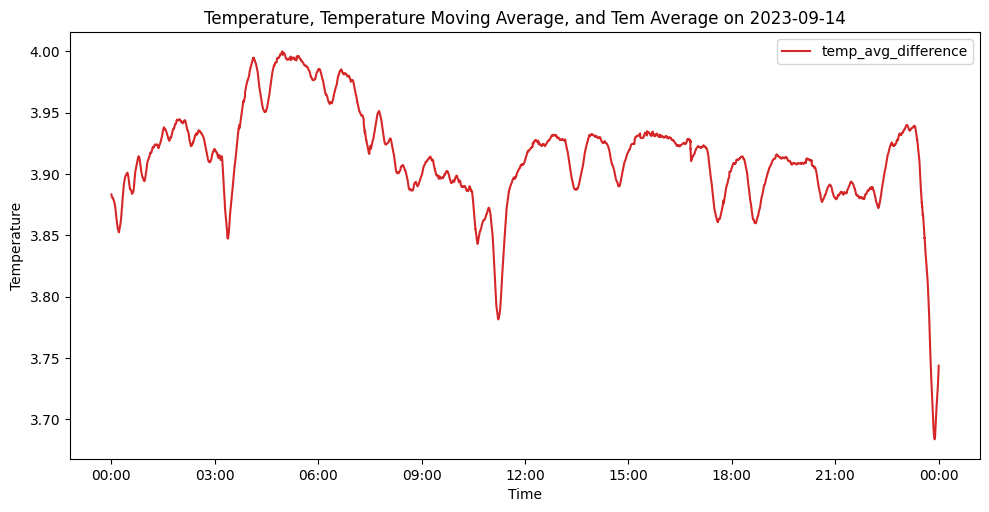

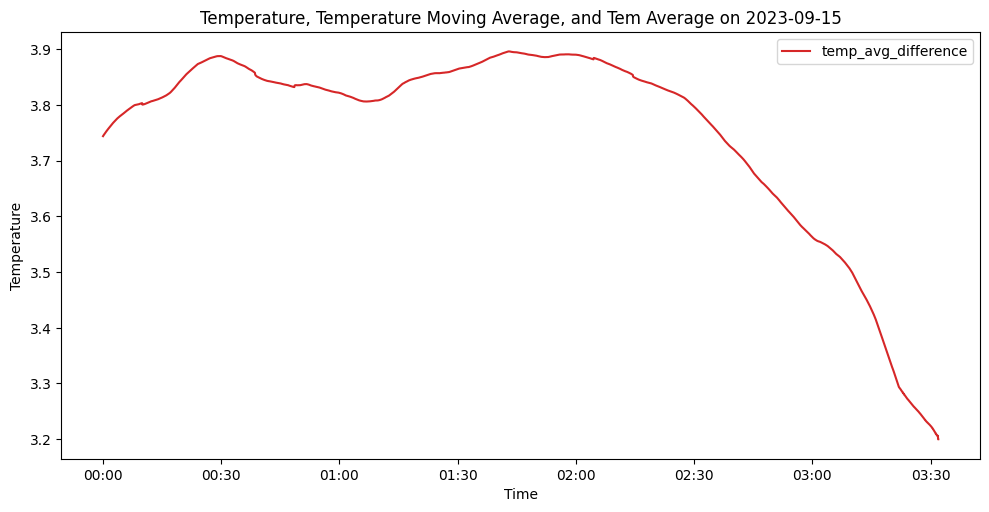

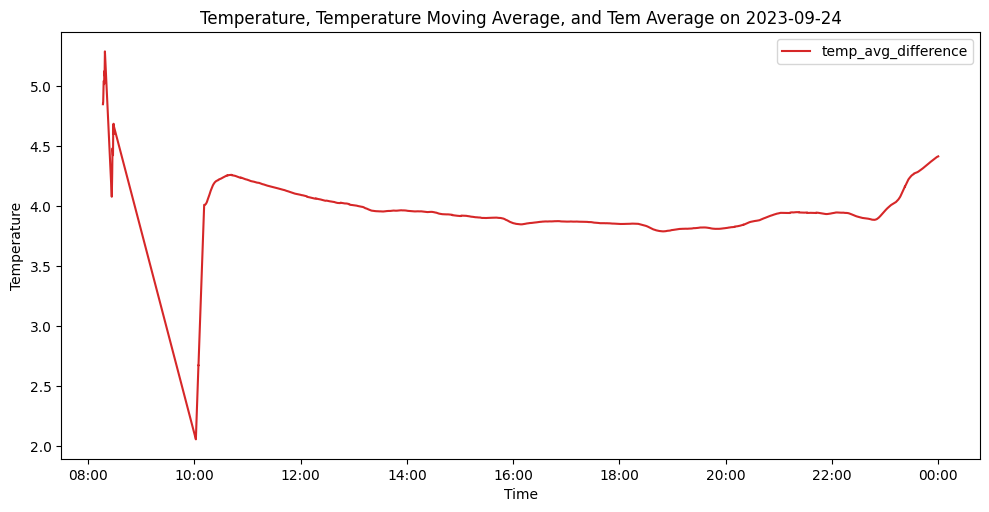

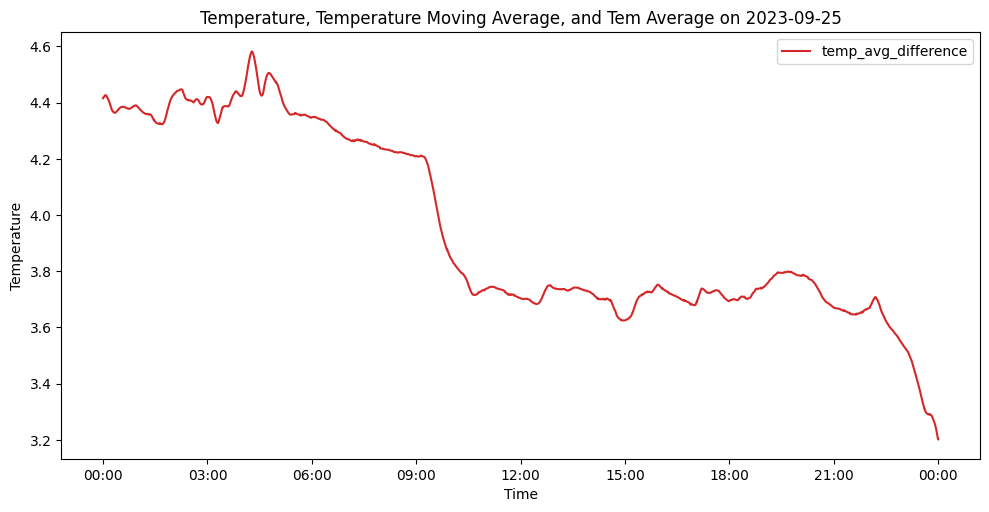

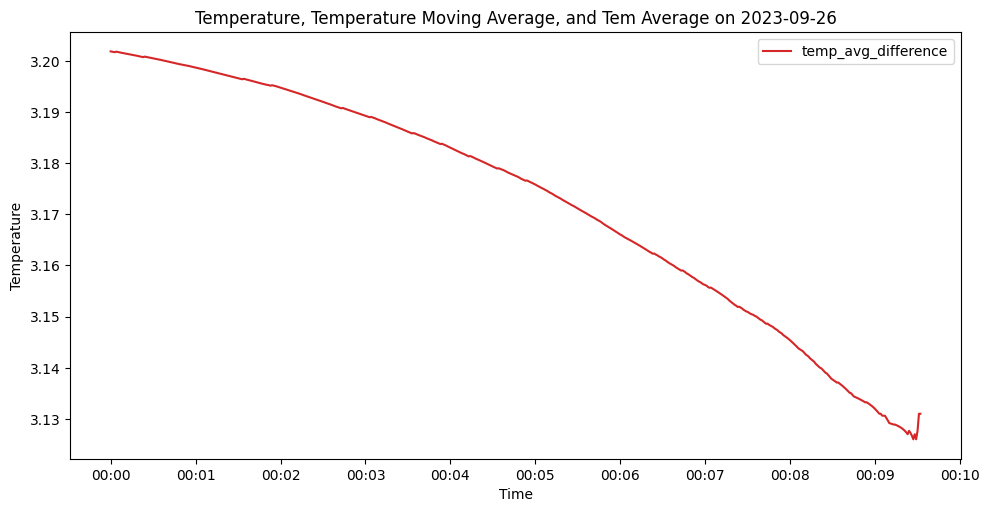

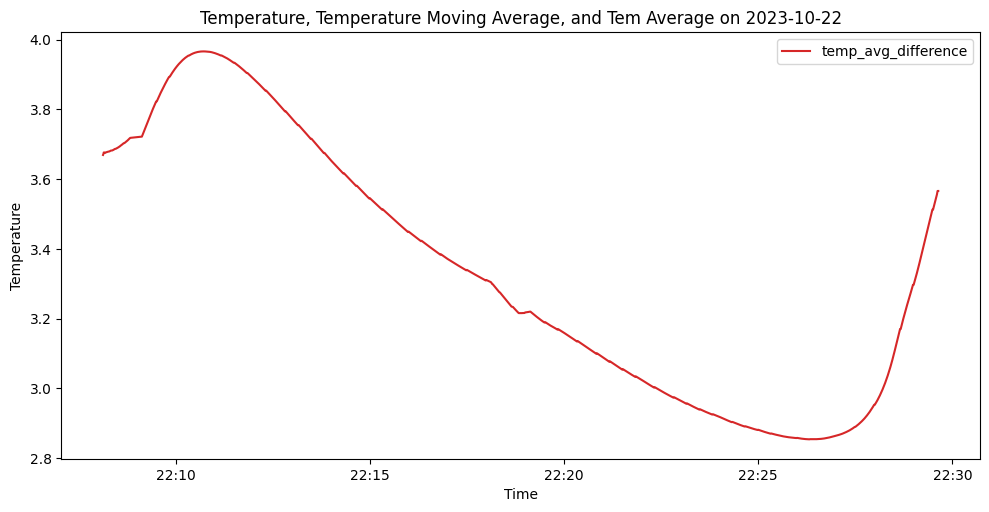

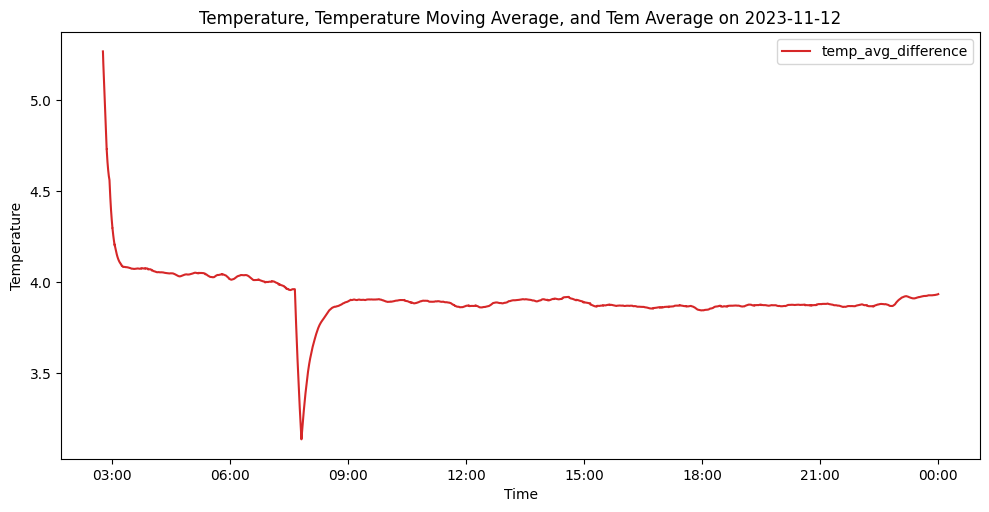

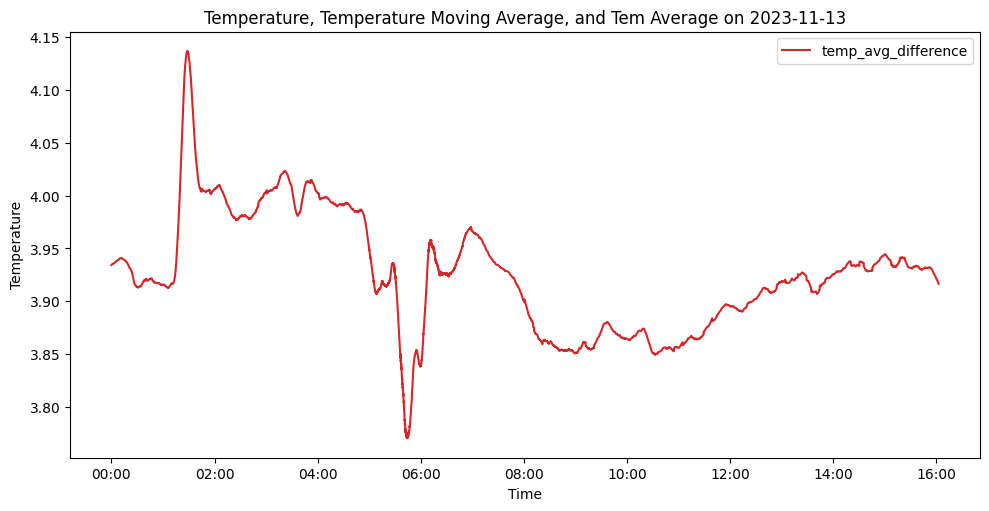

In [33]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# unique days를 추출합니다.
unique_days = new_df.index.normalize().unique()



for day in unique_days:
    # 해당 날짜의 데이터만 선택합니다.
    daily_data = new_df.loc[new_df.index.normalize() == day]

    # 'temperature_moving_avg'와 'tem_avg'가 모두 NaN이 아닌 행만 선택합니다.
    daily_data = daily_data.dropna(subset=['temperature_moving_avg', 'tem_avg'])

    # 해당 날짜의 데이터가 없다면 continue를 사용하여 다음 반복으로 넘어갑니다.
    if daily_data[['temperature', 'temperature_moving_avg', 'tem_avg']].empty:
        continue

    # 그래프를 그립니다.
    fig, ax = plt.subplots(figsize=(10,5))

    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature')
    ax.plot(daily_data.index, daily_data['temp_avg_difference'], color='tab:red', label='temp_avg_difference')
    ax.tick_params(axis='y')
    ax.legend()

    # y축 범위를 설정합니다.


    # 시간 형식을 설정합니다.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    fig.tight_layout()  
    plt.title(f'Temperature, Temperature Moving Average, and Tem Average on {day.date()}')
    plt.show()


In [34]:
# 이전 10분(600초)의 이동평균을 계산하여 'baseline' 열을 추가합니다.
new_df['baseline'] = new_df['temp_avg_difference'].rolling(window=3600).mean()

C:\Users\yeong\AppData\Local\Temp\ipykernel_13264\68778846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['baseline'] = new_df['temp_avg_difference'].rolling(window=3600).mean()


In [35]:
new_df

,_id_x,device_id_x,days,sex,temperature,humidity,voc,_id_y,device_id_y,tem,...,voc_moving_avg,tem_avg_moving_avg,hum_avg_moving_avg,temperature_moving_avg_diff,humidity_moving_avg_diff,voc_moving_avg_diff,tem_avg_moving_avg_diff,hum_avg_moving_avg_diff,temp_avg_difference,baseline
updated,,,,,,,,,,,,,,,,,,,,,
2023-08-27 00:35:36,389198301.0,357.0,330.0,0.0,31.49,43.46,7583.0,474584644.0,1743.0,26.70,...,7583.000000,26.707590,56.642687,NaN,NaN,NaN,0.000007,0.000762,4.782410,NaN
2023-08-27 00:35:36,389198301.0,357.0,330.0,0.0,31.49,43.46,7583.0,474584641.0,1743.0,26.70,...,7583.000000,26.707565,56.643562,0.000000e+00,0.000000,0.000000,-0.000025,0.000875,4.782435,NaN
2023-08-27 00:35:37,NaN,357.0,330.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7583.000000,26.707572,56.644323,0.000000e+00,0.000000,0.000000,0.000007,0.000761,4.782428,NaN
2023-08-27 00:35:38,389198333.0,357.0,330.0,0.0,31.49,43.75,7487.0,NaN,NaN,NaN,...,7551.000000,26.707579,56.645083,0.000000e+00,0.096667,-32.000000,0.000007,0.000761,4.782421,NaN
2023-08-27 00:35:39,389198334.0,357.0,330.0,0.0,31.49,44.12,7368.0,NaN,NaN,NaN,...,7505.250000,26.707586,56.645844,0.000000e+00,0.140833,-45.750000,0.000007,0.000761,4.782414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-13 16:02:39,405957086.0,357.0,408.0,0.0,28.02,36.54,7004.0,NaN,NaN,NaN,...,7053.627148,24.101867,47.948867,3.552714e-15,-0.000120,-0.036082,0.000047,-0.000178,3.916570,3.932840
2023-11-13 16:02:40,405957087.0,357.0,408.0,0.0,28.03,36.54,6942.0,NaN,NaN,NaN,...,7053.525773,24.101913,47.948688,1.718213e-05,-0.000120,-0.101375,0.000047,-0.000178,3.916540,3.932833
2023-11-13 16:02:41,405957088.0,357.0,408.0,0.0,28.03,36.55,7017.0,NaN,NaN,NaN,...,7053.517182,24.101960,47.948510,1.718213e-05,-0.000086,-0.008591,0.000047,-0.000178,3.916511,3.932825


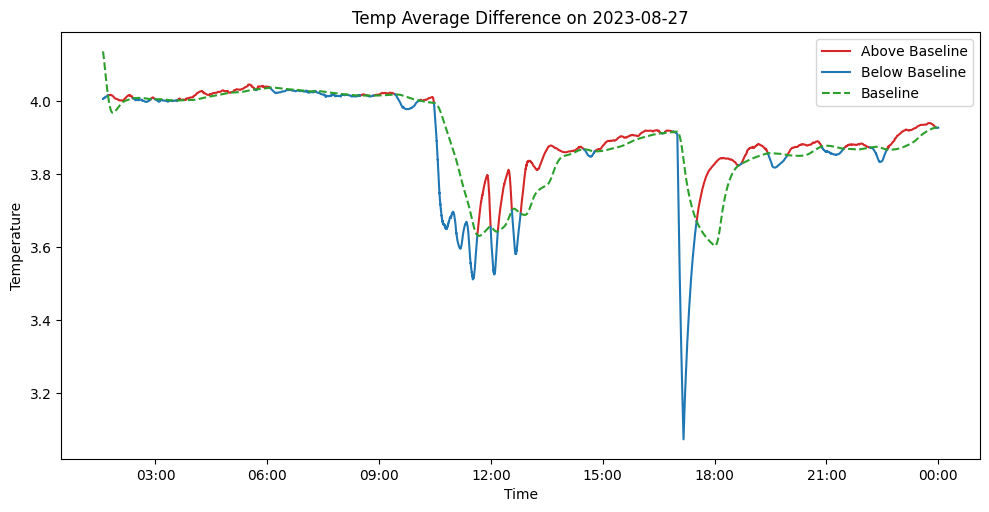

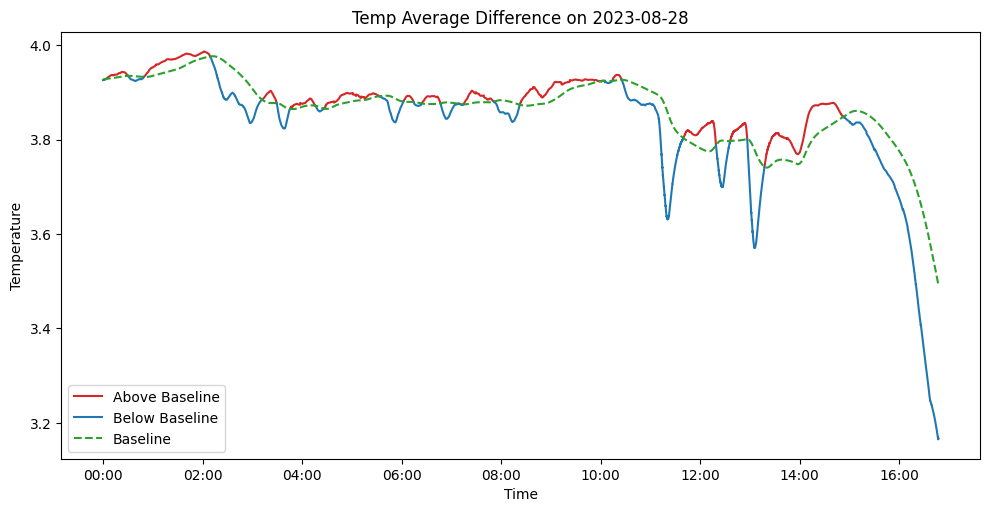

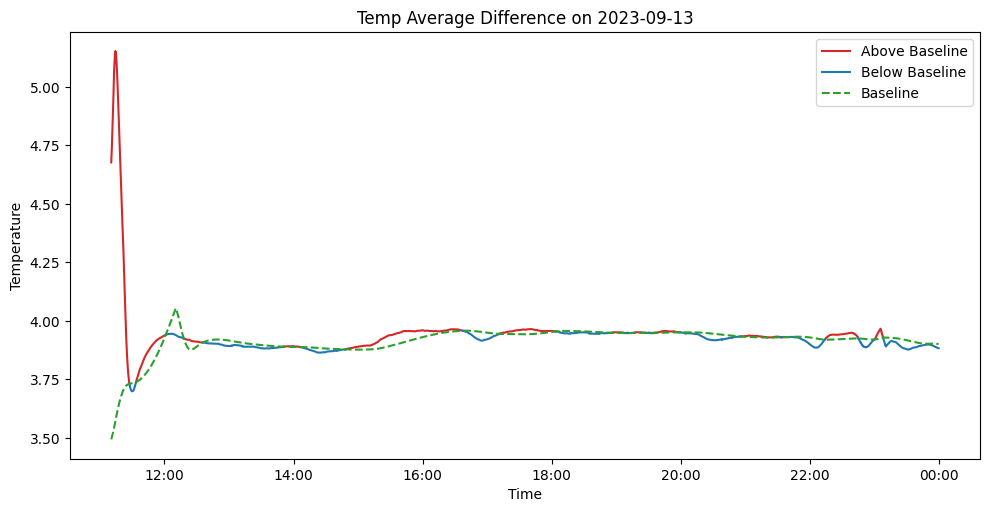

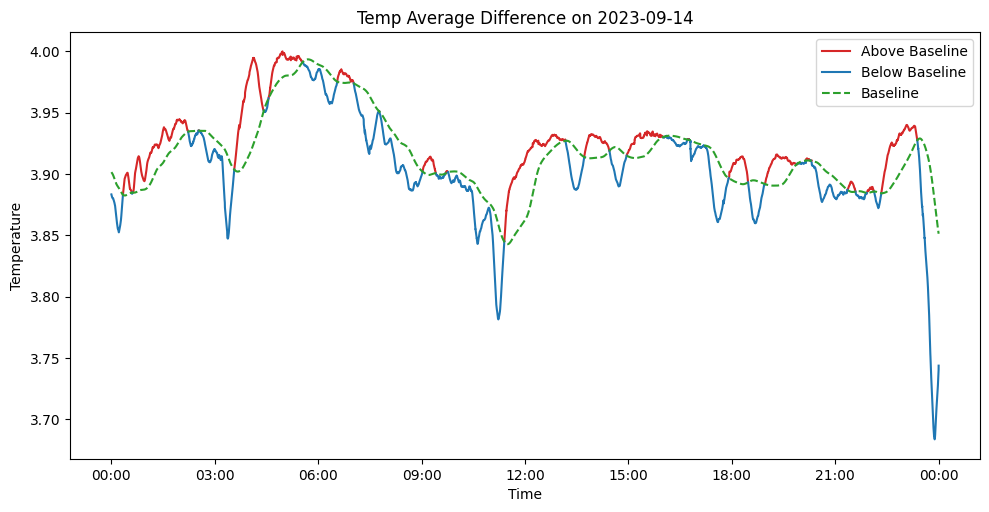

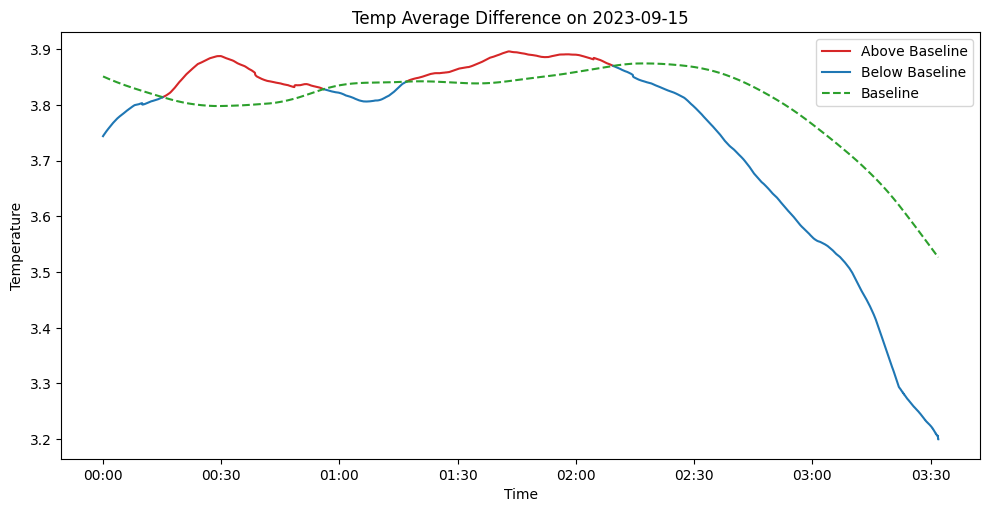

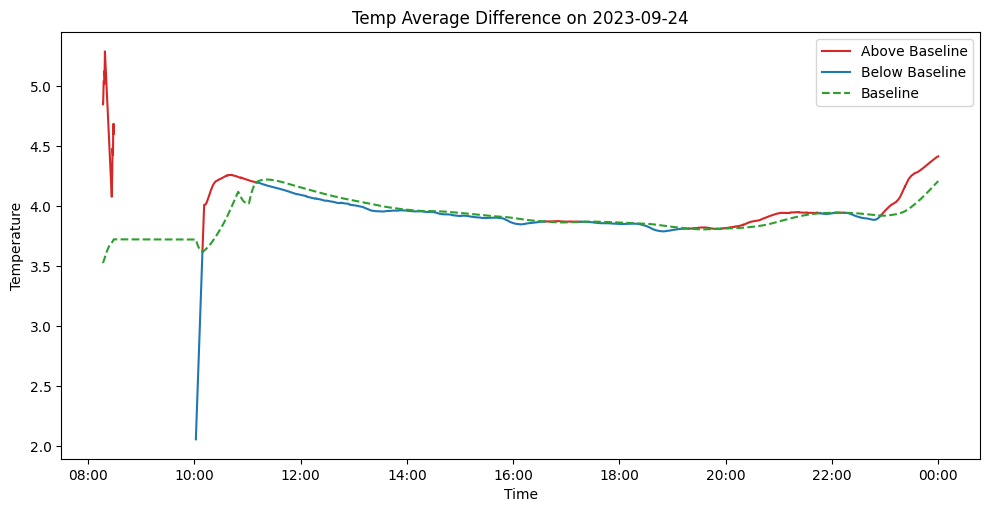

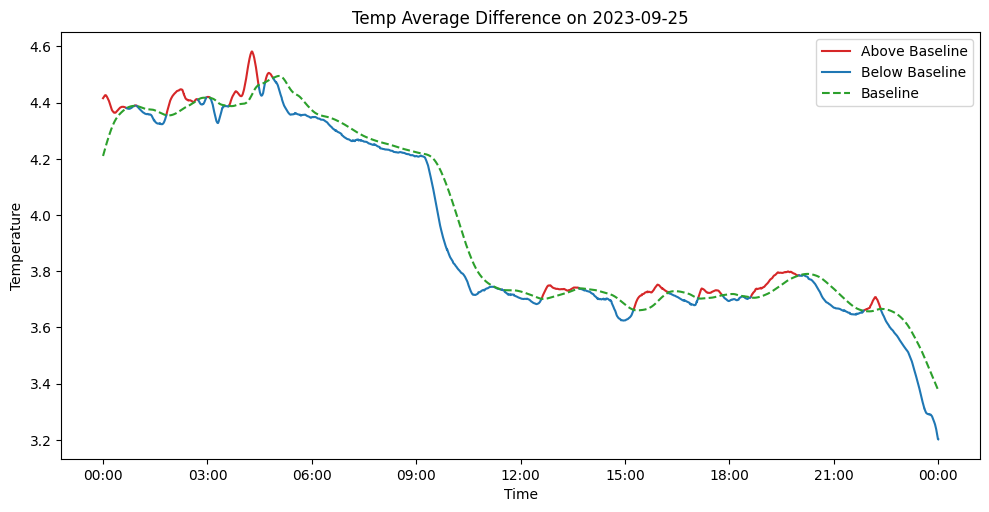

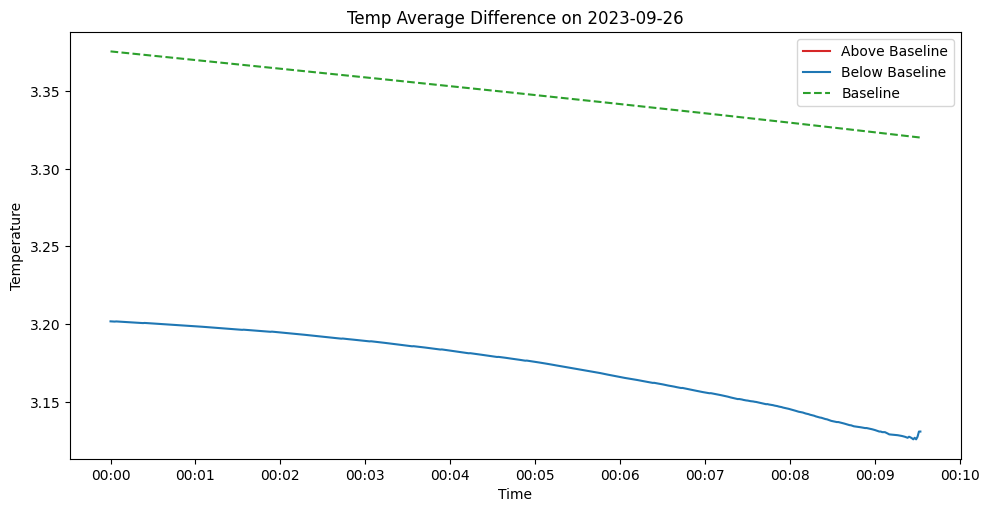

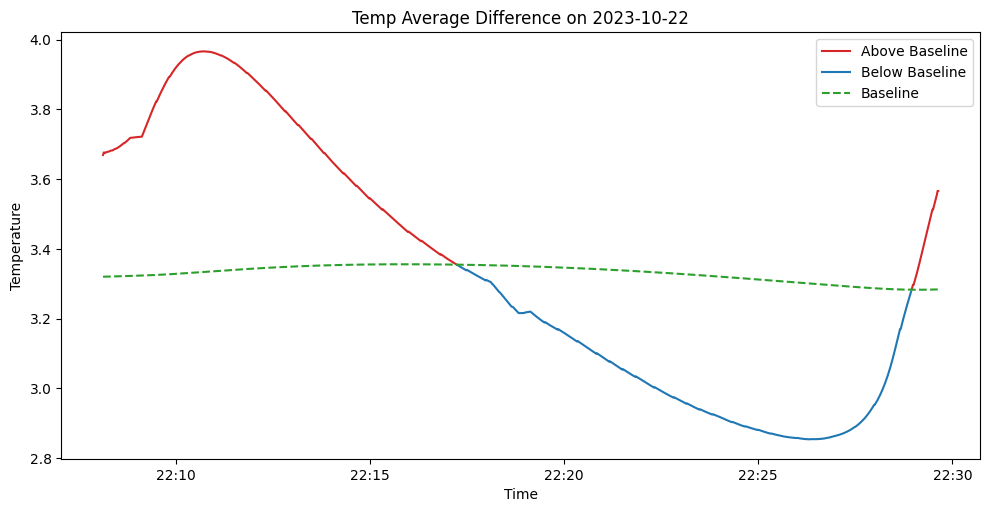

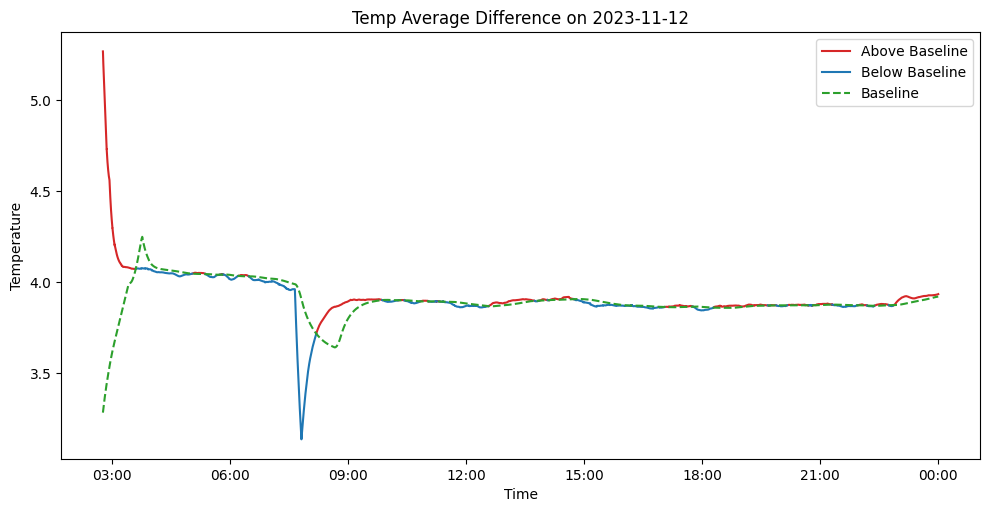

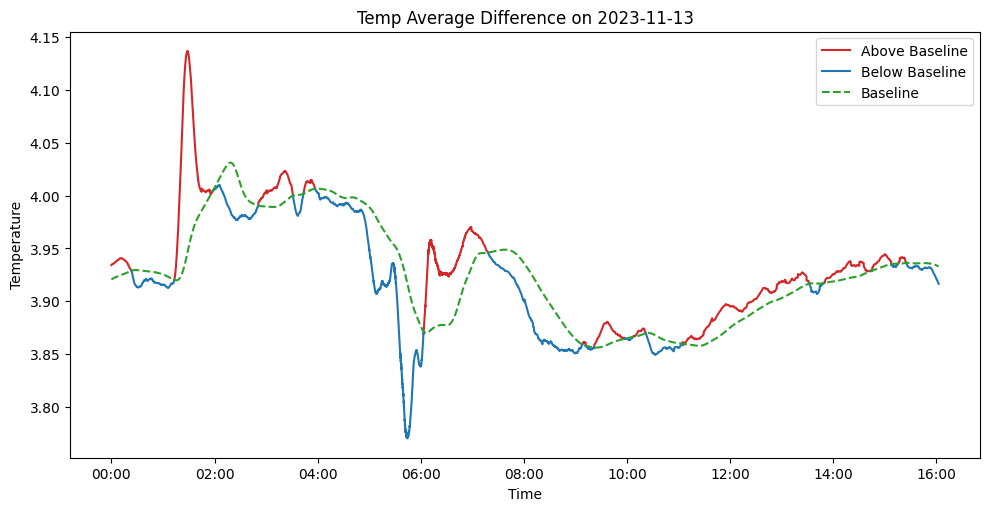

In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd



# unique days를 추출합니다.
unique_days = new_df.index.normalize().unique()

for day in unique_days:
    # 해당 날짜의 데이터만 선택합니다.
    daily_data = new_df.loc[new_df.index.normalize() == day]

    # 해당 날짜의 데이터가 없다면 continue를 사용하여 다음 반복으로 넘어갑니다.
    if daily_data[['temp_avg_difference', 'baseline']].empty:
        continue

    # 그래프를 그립니다.
    fig, ax = plt.subplots(figsize=(10,5))

    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature')

    # 현재 온도가 baseline보다 높은 경우와 낮은 경우를 구분하여 그래프를 그립니다.
    ax.plot(daily_data.index, daily_data['temp_avg_difference'].where(daily_data['temp_avg_difference'] >= daily_data['baseline']), color='tab:red', label='Above Baseline')
    ax.plot(daily_data.index, daily_data['temp_avg_difference'].where(daily_data['temp_avg_difference'] < daily_data['baseline']), color='tab:blue', label='Below Baseline')
    
    # baseline을 그래프에 추가합니다.
    ax.plot(daily_data.index, daily_data['baseline'], color='tab:green', linestyle='--', label='Baseline')

    ax.tick_params(axis='y')
    ax.legend()

    # 시간 형식을 설정합니다.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    fig.tight_layout()  
    plt.title(f'Temp Average Difference on {day.date()}')
    plt.show()
